In [1]:
from py_roboat_enviro import RoboatEnviroData
from uplink.auth import ApiTokenHeader
import json
from dotenv import load_dotenv
import os
import pandas as pd
from datetime import datetime
from io import StringIO
import pyeem

load_dotenv("../../../tests/.env")

True

# Authentication

In [2]:
token_auth = ApiTokenHeader("api-key", os.environ["STAGING_API_KEY"])
api_url = "https://roboat-enviro-staging.herokuapp.com/api/"
#token_auth = ApiTokenHeader("api-key", os.environ["DEV_API_KEY"])
#api_url = "http://localhost:5000/api/"
api_client = RoboatEnviroData(api_url, auth=token_auth)

# Get all users

In [3]:
response = api_client.get_users()
users_df = pd.DataFrame(response.json())
users_df

,active,id,username
0,True,1,drewm


# Search users

In [4]:
filters = [{"field": "id", "op": "=", "value": 1}]
filters = json.dumps(filters)
response = api_client.search_users(filters)
users_df = pd.DataFrame(response.json())
users_df

,active,id,username
0,True,1,drewm


# Get all sensors

In [5]:
response = api_client.get_sensors()
sensors_df = pd.DataFrame(response.json())
demo_sensor_sn = sensors_df["sn"][0]
sensors_df

,created_at,id,nickname,sn
0,2021-04-01T13:56:02.909577,68,REMORA,4I4DWGC88I26


# Upload sensor diagnostics

In [12]:
data = [
    {
        "datetime_utc": datetime.utcnow().isoformat()[:-3] + "Z",
        "sensor_sn":  demo_sensor_sn,
        "gps_usb_conn": True,
        "spec_usb_conn": True,
        "monochrom_usb_conn": True,
        "cellular_usb_conn": True,
        "external_usb_conn": True,
        "relay_i2c_conn": True,
        "net_conn": True,
        "mem_avail_percent": 0,
        "load_avg": 0,
        "cpu_temp": 0,
        "uptime": 0,
        "mem_avail_gb": 0,
        "disk_usage": 0,
    }
]
response = api_client.add_sensor_diagnostics(data)
print(response)

<Response [201]>


# Search sensor diagnostics

In [13]:
filters = [{"field": "sensor_sn", "op": "=", "value": demo_sensor_sn}]
filters = json.dumps(filters)
response = api_client.search_sensor_diagnostics(filters)
sensor_diagnostics_df = pd.DataFrame(response.json())
sensor_diagnostics_df.set_index("datetime_utc")

,cellular_usb_conn,cpu_temp,created_at,disk_usage,external_usb_conn,gps_usb_conn,id,load_avg,mem_avail_gb,mem_avail_percent,monochrom_usb_conn,net_conn,relay_i2c_conn,sensor_sn,spec_usb_conn,uptime
datetime_utc,,,,,,,,,,,,,,,,
2021-04-01T14:16:11.862000,True,0,2021-04-01T13:56:03.001611,0,True,True,86,0.0,0.0,0,True,True,True,4I4DWGC88I26,True,0
2021-04-01T14:16:22.201000,True,0,2021-04-01T13:56:02.916899,0,True,True,87,0.0,0.0,0,True,True,True,4I4DWGC88I26,True,0
2021-04-01T14:36:28.426000,True,0,2021-04-01T13:56:03.001611,0,True,True,88,0.0,0.0,0,True,True,True,4I4DWGC88I26,True,0
2021-04-01T19:27:54.987000,True,0,2021-04-01T19:27:52.654763,0,True,True,89,0.0,0.0,0,True,True,True,4I4DWGC88I26,True,0
2021-04-01T19:39:25.874000,True,0,2021-04-01T19:27:52.655630,0,True,True,90,0.0,0.0,0,True,True,True,4I4DWGC88I26,True,0
2021-04-01T19:39:28.682000,True,0,2021-04-01T19:27:52.655630,0,True,True,91,0.0,0.0,0,True,True,True,4I4DWGC88I26,True,0
2021-04-01T19:39:41.826000,True,0,2021-04-01T19:27:52.655630,0,True,True,92,0.0,0.0,0,True,True,True,4I4DWGC88I26,True,0


# Search sensor logs

In [14]:
filters = [{"field": "sensor_sn", "op": "=", "value": demo_sensor_sn}]
filters = json.dumps(filters)
response = api_client.search_sensor_logs(filters)
sensor_logs_df = pd.DataFrame(response.json())
#sensor_logs_df.set_index("datetime_utc", inplace=True)
sensor_logs_df

,created_at,datetime_utc,filename,func_name,id,line_num,message,priority,sensor_sn,user
0,2021-04-01T13:56:03.035384,2021-04-01T14:16:12.130000,string,string,64,0,string,string,4I4DWGC88I26,string


# Search spectroscopy measurement metadata

In [15]:
filters = [{"field": "sensor_sn", "op": "=", "value": demo_sensor_sn}]
filters = json.dumps(filters)
response = api_client.search_spectroscopy_measurement_metadata(filters)
metadata_df = pd.DataFrame(response.json())
metadata_df

,calibration_sample,collected_by,comments,created_at,datetime_utc,description,dilution_factor,id,prototypical_sample,s3_filepath,sample_set,scan_index,scan_type,sensor_sn,source_a,source_b,source_d,source_e,source_f,test_sample
0,None,Drew Meyers,These are some additional comments about the s...,2021-04-01T13:56:02.888622,2021-04-01T14:16:12.692000,This is a description of the sample.,1,63,None,W1ECRAFWZCGTSJB02Z0ODLYSVTSU2XLMKS0G_sample_ee...,W1ECRAFWZCGTSJB02Z0ODLYSVTSU2XLMKS0G,1,sample_eem,4I4DWGC88I26,None,None,None,None,None,None


# Download spectroscopy measurements

In [16]:
for filename in metadata_df["s3_filepath"]:
    response = api_client.get_spec_measurements_by_filename(filename)
    data = response.json()["measurement"]
    eem_df = pd.read_csv(StringIO(data), sep='\t', header=0).set_index("Wavelength")
    eem_df.columns = eem_df.columns.astype(float)
    eem_df = eem_df.reindex(sorted(eem_df.columns), axis=1)
    display(eem_df)
    break

,200.0,202.0,204.0,206.0,208.0,210.0,212.0,214.0,216.0,218.0,...,482.0,484.0,486.0,488.0,490.0,492.0,494.0,496.0,498.0,500.0
Wavelength,,,,,,,,,,,,,,,,,,,,,
245.917,36.718288,512.591270,189.890101,680.452304,284.690677,766.326012,686.183977,1176.214879,815.173233,943.255388,...,4.679191,0.000000,5.519755,8.194879,6.302053,8.336040,-1.039657,11.816265,-5.382534,3.092274
248.158,275.387159,-35.351122,586.933040,-425.282690,83.732552,391.315410,452.257621,537.283340,539.066170,593.901541,...,-11.697978,1.683828,-11.499489,-9.158982,-10.665013,-5.884263,-8.317254,-6.752151,-10.167008,-10.513732
250.400,229.094958,501.283761,176.247340,385.956282,816.889286,684.365099,1185.313195,1219.000237,820.335170,885.094208,...,-2.211719,-4.297845,12.523340,-2.187379,7.149118,-5.006380,0.000000,-3.191548,6.106005,7.015820
252.643,404.243344,544.868492,456.122334,711.675066,239.677978,502.613554,995.809684,863.288321,1288.275311,1282.049317,...,2.146446,0.000000,-4.051249,-4.245649,3.202214,11.336803,2.861478,-4.336301,1.975268,-22.468930
254.887,517.825868,306.797035,543.082248,867.348285,563.175802,813.638535,913.565361,1338.993732,1098.264422,1174.857497,...,-2.115035,-4.109966,-1.995981,7.321155,3.681245,6.383371,-0.563921,-0.610406,-5.839084,4.696388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816.234,348.823734,353.511221,155.364628,459.305305,385.169740,342.400984,327.496898,522.762168,499.622304,372.644104,...,11.697978,9.682012,9.659571,19.764120,11.634559,14.710659,11.956052,18.568416,16.745660,13.606007
818.618,-183.591439,-70.702244,-155.364628,-221.146999,-351.676719,-48.914426,-187.141085,-217.817570,131.479554,-11.645128,...,-7.408719,-3.788613,-5.519755,-9.641034,1.454320,-4.413198,-4.158627,-10.690906,4.186415,-11.132187
821.002,36.718288,866.102490,586.933040,510.339228,653.113906,326.096175,296.306717,450.156312,644.249813,186.322052,...,12.867776,7.156270,12.879427,13.015396,8.725919,2.942132,4.678455,11.816265,10.765067,18.553645


## Visualize the downloaded EEM

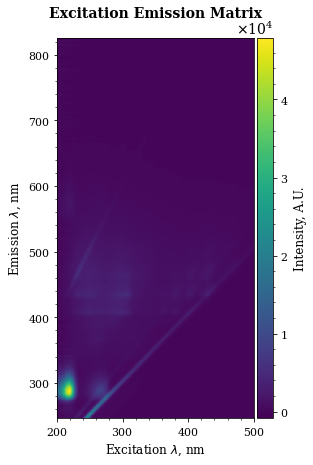

In [18]:
import matplotlib.pyplot as plt
ax = pyeem.plots.eem_plot(eem_df, intensity_units="Intensity, A.U.", fig_kws={"figsize": (7,7)})
plt.show()